## Setup

In [8]:
pip install opencv-contrib-python

Note: you may need to restart the kernel to use updated packages.


In [14]:
import sys
# Python 3.7 is required
assert sys.version_info >= (3, 7)

import cv2
import numpy as np

from matplotlib import pyplot as plt

# Make sure that OpenCV optimization is enabled
if not cv.useOptimized():
    cv.setUseOptimized(True)
    
cv.useOptimized()

True

In [10]:
import imageio

## Exercises

1. Load and display the image 'dog.jfif'. Save the image in png format.


In [20]:
img_jfif =cv.imread("images/dog.jfif")
cv.imshow("jfif",img_jfif)
cv.waitKey(0)
cv.destroyAllWindows()

cv.imwrite("images/dog_save.png",img_jfif)

True

2. *Suggest 2 ways and write codes to display 2 images simultaneously.* You can use any image snapped from your handphone, downloaded from internet or images from weekly materials on MS teams. The 2 images are original color image and its corresponding grayscale image.

In [24]:
img = cv.imread("images/soccer.jpg")
img_grayscale = cv.imread("images/soccer.jpg",0)

cv.imshow("original",img)
cv.imshow("grayscale",img_grayscale)
cv.waitKey(0)
cv.destroyAllWindows()
                

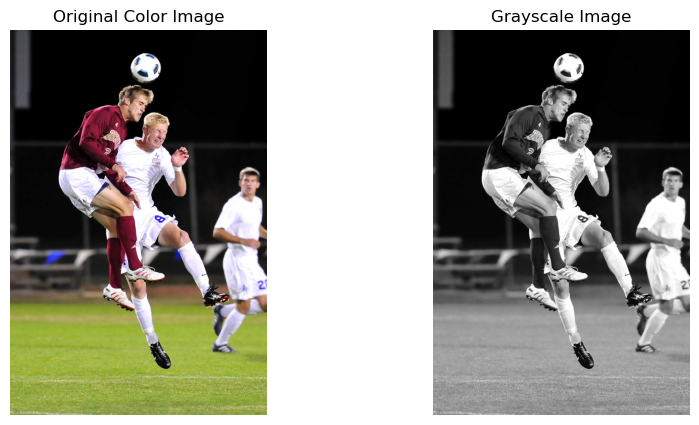

In [34]:
# Load the original color image
color_image = cv.imread('images/soccer.jpg')
color_image = cv.cvtColor(color_image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Convert the color image to grayscale
gray_image = cv.cvtColor(color_image, cv2.COLOR_RGB2GRAY)

# Plot both images
plt.figure(figsize=(10, 5))

# Display the color image
plt.subplot(1, 2, 1)
plt.imshow(color_image)
plt.title('Original Color Image')
plt.axis('off')

# Display the grayscale image
plt.subplot(1, 2, 2)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.show()


3. Write codes that performs the following:
    * Load the video “img_pexels.mp4” into the Python environment, resize it and display the videos with smaller frames (The frames can be of any size, as long as it is smaller). You can specify an arbitrary frame rate.
    * Save it as a separate files: “smaller_img_pexels.avi” or "smaller_img_pexels.mp4"

In [28]:
cap = cv.VideoCapture("Videos/img_pexels.mp4")

if not cap.isOpened():
    sys.exit("Invalid video path")

fourcc = cv.VideoWriter_fourcc("M","J","P","G")
fps =90

width = int(cap.get(3))
height = int(cap.get(4))

new_width = width//3
new_height = height//6

out = cv.VideoWriter("video_img_pexels.avi",fourcc,fps,(new_width,new_height))

while cap.isOpened():
    ret,frame = cap.read()

    if not ret:
        print("frame not received")
        break

    resized_frame = cv.resize(frame,(new_width, new_height))
    
    cv.namedWindow("frame", cv.WINDOW_NORMAL)
    cv.resizeWindow("frame", new_width, new_height)  
    cv.imshow("frame",resized_frame)

    out.write(resized_frame)
    if cv.waitKey(1) & 0xFF == 27:
        break
        
cap.release()
out.release()
cv.destroyAllWindows()


4. Enlarge the image "dog.jfif" by using different techniques:
    1) Linear interpolation
   2) Cubic interpolation
   3) Nearest neighbor interpolation.

Perform profiling on each method. Comment on the **execution times** and **quality of resulting images**.

In [48]:
%%time
img = cv.imread("images/dog.jfif")
img_resize = cv.resize(img, None,fx=5,fy=5,interpolation=cv.INTER_LINEAR)

cv.imshow("upscale",img_resize)
cv.waitKey(0)
cv.destroyAllWindows()


CPU times: total: 0 ns
Wall time: 3.4 s


In [50]:
%%time
img = cv.imread("images/dog.jfif")
img_resize = cv.resize(img, None,fx=5,fy=5,interpolation=cv.INTER_CUBIC)

cv.imshow("upscale",img_resize)
cv.waitKey(0)
cv.destroyAllWindows()

CPU times: total: 0 ns
Wall time: 1.58 s


In [52]:
%%time
img = cv.imread("images/dog.jfif")
img_resize = cv.resize(img, None,fx=5,fy=5,interpolation=cv.INTER_NEAREST)

cv.imshow("upscale",img_resize)
cv.waitKey(0)
cv.destroyAllWindows()

CPU times: total: 0 ns
Wall time: 1.52 s


Execution Time: Nearest neighbor interpolation is the quickest, linear interpolation is moderately fast, and cubic interpolation is the slowest.

Image Quality: Cubic interpolation yields the best quality with smoothness and detail retention, followed by linear interpolation. Nearest neighbor interpolation trades off quality for speed, maintaining sharp edges but possibly causing pixelation.